# Projeto 10: Regressão venda de vídeo games

## Etapa 1: Importação das bibliotecas

In [1]:
!pip install torch==1.4.0

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
import torch.nn.functional as F

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Etapa 2: Base de dados

In [3]:
torch.manual_seed(123)

In [4]:
df = pd.read_csv('games.csv')

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(16719, 16)

In [7]:
df.drop(['Other_Sales', 'Global_Sales', 'Developer'], axis = 1, inplace=True)
df.shape

(16719, 13)

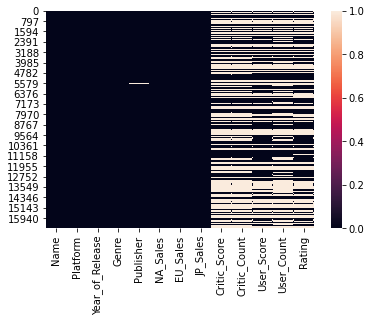

In [8]:
sns.heatmap(df.isnull());

In [9]:
df.dropna(axis=0, inplace=True)

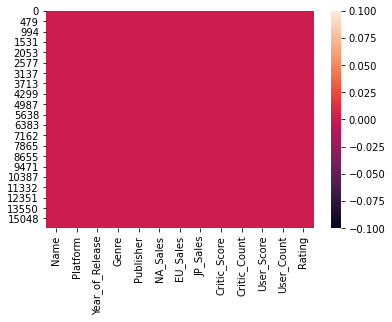

In [10]:
sns.heatmap(df.isnull());

In [11]:
df.shape

(6825, 13)

In [12]:
df.loc[df['NA_Sales'] > 1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,NCAA Football 14,X360,2013.0,Sports,Electronic Arts,1.01,0.00,0.00,77.0,18.0,5.8,74.0,E
1877,NFL 2K1,DC,2000.0,Sports,Sega,1.02,0.05,0.00,97.0,22.0,6,47.0,E
1881,Madden NFL 2004,XB,2003.0,Sports,Electronic Arts,1.02,0.02,0.00,92.0,27.0,8.3,48.0,E
1889,NCAA Football 13,X360,2012.0,Action,Electronic Arts,1.02,0.00,0.00,76.0,20.0,5.5,65.0,E


In [13]:
df.drop(df.loc[df['NA_Sales'] <= 1].index, axis=0, inplace=True)

In [14]:
df.shape

(584, 13)

In [15]:
df.loc[df['EU_Sales'] > 1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Medal of Honor,PS,1998.0,Shooter,Electronic Arts,1.44,1.09,0.00,92.0,17.0,8.6,80.0,T
573,Tom Clancy's Splinter Cell,PS2,2003.0,Action,Ubisoft,1.15,1.11,0.00,89.0,24.0,7.7,102.0,T
591,Mario Strikers Charged,Wii,2007.0,Sports,Nintendo,1.05,1.05,0.24,79.0,47.0,8,124.0,E10+
610,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,80.0,15.0,7.9,46.0,T


In [16]:
df.drop(df.loc[df['EU_Sales'] <= 1].index, axis=0, inplace=True)

In [17]:
df.shape

(258, 13)

In [18]:
df['Name'].value_counts()

Grand Theft Auto V                          4
Battlefield 4                               3
Assassin's Creed IV: Black Flag             3
The Elder Scrolls V: Skyrim                 3
Call of Duty: Ghosts                        3
                                           ..
Far Cry 4                                   1
The Sims: Unleashed                         1
Pokémon Emerald Version                     1
Metal Gear Solid 4: Guns of the Patriots    1
Uncharted 4: A Thief's End                  1
Name: Name, Length: 223, dtype: int64

In [19]:
df.drop('Name', axis=1, inplace=True)
df.shape

(258, 12)

In [20]:
X = df.iloc[:, [0,1,2,3,7,8,9,10,11]].values
y = df.iloc[:,4:7].values

In [21]:
X

array([['Wii', 2006.0, 'Sports', ..., '8', 322.0, 'E'],
       ['Wii', 2008.0, 'Racing', ..., '8.3', 709.0, 'E'],
       ['Wii', 2009.0, 'Sports', ..., '8', 192.0, 'E'],
       ...,
       ['Wii', 2007.0, 'Sports', ..., '8', 124.0, 'E10+'],
       ['PS2', 2001.0, 'Racing', ..., '7.9', 46.0, 'T'],
       ['PS2', 2003.0, 'Simulation', ..., '8.4', 42.0, 'T']], dtype=object)

In [22]:
y

array([[4.136e+01, 2.896e+01, 3.770e+00],
       [1.568e+01, 1.276e+01, 3.790e+00],
       [1.561e+01, 1.093e+01, 3.280e+00],
       [1.128e+01, 9.140e+00, 6.500e+00],
       [1.396e+01, 9.180e+00, 2.930e+00],
       [1.444e+01, 6.940e+00, 4.700e+00],
       [9.710e+00, 7.470e+00, 4.130e+00],
       [8.920e+00, 8.030e+00, 3.600e+00],
       [1.500e+01, 4.890e+00, 2.400e-01],
       [9.010e+00, 8.490e+00, 2.530e+00],
       [7.020e+00, 9.090e+00, 9.800e-01],
       [4.740e+00, 9.200e+00, 4.160e+00],
       [9.660e+00, 5.140e+00, 6.000e-02],
       [8.410e+00, 5.490e+00, 4.700e-01],
       [3.430e+00, 5.350e+00, 5.320e+00],
       [6.850e+00, 5.090e+00, 1.870e+00],
       [9.040e+00, 4.240e+00, 1.300e-01],
       [9.700e+00, 3.680e+00, 1.100e-01],
       [4.990e+00, 5.730e+00, 6.500e-01],
       [8.250e+00, 4.240e+00, 7.000e-02],
       [8.520e+00, 3.590e+00, 8.000e-02],
       [5.540e+00, 5.730e+00, 4.900e-01],
       [6.990e+00, 4.510e+00, 3.000e-01],
       [6.620e+00, 2.550e+00, 2.66

In [23]:
oneHot = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(),
                                          [0,2,3,8])], remainder='passthrough')
X = oneHot.fit_transform(X).toarray()

In [24]:
X.shape

(258, 61)

## Etapa 3: Construção do modelo

In [25]:
class reg_torch(nn.Module):
  def __init__(self):
    super().__init__()
    self.dense0 = nn.Linear(61, 32)
    self.dense1 = nn.Linear(32, 32)
    self.output = nn.Linear(32, 3)
    self.activation = nn.Sigmoid()

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation(X)
    X = self.dense1(X)
    X = self.activation(X)
    X = self.output(X)
    return X

In [26]:
reg = reg_torch()
criterion = nn.MSELoss()
optimizer = optim.Adam(reg.parameters())

In [27]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [28]:
X = torch.tensor(X, dtype = torch.float)
y = torch.tensor(y, dtype = torch.float)

In [29]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [30]:
dataset = torch.utils.data.TensorDataset(X, y)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 4: Treinamento do modelo

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [32]:
reg.to(device)

reg_torch(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=3, bias=True)
  (activation): Sigmoid()
)

In [33]:
for epoch in range(2000):
  running_loss = 0.
  running_mse_0 = 0.
  running_mse_1 = 0.
  running_mse_2 = 0.

  for i, data in enumerate(train_loader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = reg.forward(inputs)

    mse_0 = F.mse_loss(outputs[:, 0], labels[:, 0]).item()
    mse_1 = F.mse_loss(outputs[:, 1], labels[:, 1]).item()
    mse_2 = F.mse_loss(outputs[:, 2], labels[:, 2]).item()

    running_mse_0 += mse_0 * len(inputs)
    running_mse_1 += mse_1 * len(inputs)
    running_mse_2 += mse_2 * len(inputs)

    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss = loss.item()
    running_loss += loss * len(inputs)


    print('\rÉpoca {:4d} - Loop {:3d} de {:3d}: erro_0 {:6.4f} | erro_1 {:6.4f} | erro_2 {:6.4f} - custo {:6.4f}' \
          .format(epoch+1, i+1, len(train_loader), mse_0, mse_1, mse_2, loss, end='\r' ))
    
  print('\nÉPOCA {:4d} finalizada: erro_0 {:6.4f} | erro_1 {:6.4f} | erro_2 {:6.4f} - custo {:6.4f}         \n' \
        .format(epoch+1, running_mse_0/len(dataset), running_mse_1/len(dataset), running_mse_2/len(dataset), running_loss/len(dataset)))

Streaming output truncated to the last 5000 lines.
Época 1828 - Loop  18 de  26: erro_0 33.8108 | erro_1 12.3953 | erro_2 1.2055 - custo 15.8039
Época 1828 - Loop  19 de  26: erro_0 3.5169 | erro_1 0.6907 | erro_2 0.1944 - custo 1.4673
Época 1828 - Loop  20 de  26: erro_0 8.0937 | erro_1 5.1174 | erro_2 3.6548 - custo 5.6220
Época 1828 - Loop  21 de  26: erro_0 5.5316 | erro_1 0.9266 | erro_2 0.2552 - custo 2.2378
Época 1828 - Loop  22 de  26: erro_0 4.6898 | erro_1 8.5913 | erro_2 2.3415 - custo 5.2075
Época 1828 - Loop  23 de  26: erro_0 2.4575 | erro_1 2.3573 | erro_2 0.5092 - custo 1.7747
Época 1828 - Loop  24 de  26: erro_0 8.0783 | erro_1 3.7270 | erro_2 2.3954 - custo 4.7335
Época 1828 - Loop  25 de  26: erro_0 2.5145 | erro_1 1.6624 | erro_2 0.2493 - custo 1.4754
Época 1828 - Loop  26 de  26: erro_0 0.8813 | erro_1 0.5799 | erro_2 0.3165 - custo 0.5926

ÉPOCA 1828 finalizada: erro_0 11.9771 | erro_1 5.8640 | erro_2 1.1621 - custo 6.3344         

Época 1829 - Loop   1 de  26: e

## Etapa 5: Avaliação do modelo

In [34]:
reg.eval()

reg_torch(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=3, bias=True)
  (activation): Sigmoid()
)

In [35]:
X = X.to(device)
previsoes = reg.forward(X)

In [36]:
previsoes

tensor([[3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [2.9230, 2.5778, 0.1202],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2683, 2.5407, 0.3670],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.209

In [37]:
previsoes = previsoes.cpu().detach().numpy()

In [38]:
previsoes

array([[3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [2.922991  , 2.577776  , 0.12020638],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.268337  , 2.5407403 , 0.36699396],
       [3.

In [39]:
previsoes.mean(axis=0)

array([3.2035642, 2.3024027, 0.5935898], dtype=float32)

In [40]:
y.mean(axis=0)

tensor([3.2838, 2.3505, 0.5862])

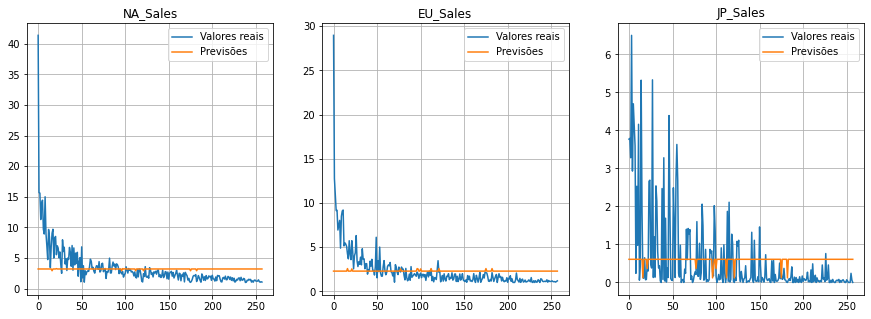

In [41]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
  ax[i].plot(y[:,i], label='Valores reais')
  ax[i].plot(previsoes[:,i], label='Previsões')
  ax[i].legend()
  ax[i].grid()
  ax[i].set_title(df.columns[4 + i])